In [1]:
"""Paint on Webcam"""

import cv2

cap = cv2.VideoCapture(0)
face_cascade=cv2.CascadeClassifier('Haarcascades/haarcascade_frontalface_default.xml');
myPoints =  []
drawing = False 
ix,iy = -1,-1

def detectFace(gray,frame):
    faces=face_cascade.detectMultiScale(gray,1.3,5)
    for(x,y,w,h) in faces:
        cv2.rectangle(frame,(x,y),(x+w,y+h),(12,153,36),2)
    return frame

def draw_circle(event,x,y,flags,param):
    global ix,iy,drawing
    if event == cv2.EVENT_LBUTTONDOWN:
        drawing = True
        ix,iy = x,y
        myPoints.append([x,y])
    elif event == cv2.EVENT_MOUSEMOVE:
        if drawing == True:
            cv2.circle(canvas,(x,y),5,(0,0,255),-1)
            myPoints.append([x,y])
    elif event == cv2.EVENT_LBUTTONUP:
        drawing = False

def drawOnCanvas(myPoints):
    for point in myPoints:
        cv2.circle(canvas, (point[0], point[1]), 8,(0,0,255), cv2.FILLED)
        
cv2.namedWindow('image')
cv2.setMouseCallback('image',draw_circle)


while(1):
    ret,frame = cap.read()
    gray=cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY)
    canvas=detectFace(gray,frame)
    #cv2.imshow('image',img)
    if len(myPoints)!=0:
        drawOnCanvas(myPoints)
    cv2.imshow('image',canvas)
    k = cv2.waitKey(1) & 0xFF
    if k == 27:
        break
    elif k== ord('r'):
        myPoints=[]
cv2.destroyAllWindows()

137 147 455 465
137 147 455 465
128 133 434 439
128 133 434 439
114 101 453 440
125 142 427 444
125 142 427 444
121 147 423 449
121 147 423 449
126 162 406 442
126 162 406 442
113 140 427 454
113 140 427 454
128 146 425 443
128 146 425 443
128 156 421 449
128 156 421 449
122 157 415 450
122 157 415 450
58 79 425 446
58 79 425 446
58 79 425 446
58 79 425 446
62 86 421 445
62 86 421 445
124 156 406 438


my points     : [(3, 5.5), (4.5, 4.5), (1.85, 1), (5, 1)]
aspect ratios :  [1.104536101718726, 0.8602325267042626, 0.8964373932405989, 0.9899494936611666]
new distances :  [1.656804152578089, 1.290348790056394, 1.3446560898608984, 1.48492424049175]
angles :  [-84.8055710922652, 54.46232220802562, 51.34019174590991, -45.0]
new points :  [(1.9000000000000001, 0.10000000000000009), (2.5, 2.8), (2.59, 2.8), (2.8000000000000003, 0.6999999999999997)]


array([0., 0.])

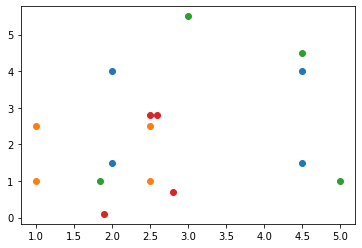

In [104]:
"""Divising an algorithm"""
#2nd and 3rd Quarant problem
import math
import matplotlib.pyplot as plt
import numpy as np

def dist(p1,p2):
    return math.sqrt((p1[1]-p2[1])**2+(p1[0]-p2[0])**2)

def centre(face):
    return (face[0][0]+(dist(face[0],face[1])/2),face[0][1]-(dist(face[1],face[3])/2))

def height(face):
    return dist(face[0],face[2])

def aratio(point,face):
    return dist(point,centre(face))

def angle(point,face):
    
    c=centre(face)
    return math.atan((point[1]-c[1])/(point[0]-c[0]))

def npoint(ncentre,ndist,angle):
    return ((ndist*math.cos(angle)+ncentre[0]),(ndist*math.sin(angle)+ncentre[1]))


def sep(vec):
    xs=[]
    ys=[]
    for i in range(0,len(vec)):
        xs.append(vec[i][0])
        ys.append(vec[i][1])
    return [xs,ys]
    

#myPoints=[(3,5.5),(4.5,4.5),(5,3.5)]
myPoints=[(3,5.5),(4.5,4.5),(1.85,1),(5,1)]

face=[(2,4),(4.5,4),(2,1.5),(4.5,1.5)]
nface=[(1,2.5),(2.5,2.5),(1,1),(2.5,1)]


v_aratio=[]
v_dist=[]
v_angles=[]
new_points=[]




for i in myPoints:
    v_aratio.append(dist(i,centre(face))/height(face))
    

for i in v_aratio:
    v_dist.append(i*height(nface))


for i in myPoints:
    v_angles.append(angle(i,face))
    
for i,j in zip(v_dist,v_angles):
    new_points.append(npoint(centre(nface),i,j))

plt.scatter(sep(face)[0],sep(face)[1])
plt.scatter(sep(nface)[0],sep(nface)[1])
plt.scatter(sep(myPoints)[0],sep(myPoints)[1])
plt.scatter(sep(new_points)[0],sep(new_points)[1])



print("my points     :",myPoints)
print("aspect ratios : ",v_aratio)
print("new distances : ",v_dist)
print("angles : ",list(map(math.degrees,(v_angles))))
print("new points : ",new_points)




In [64]:
"""checking working of all functions"""
print("aspect ratio ",aratio(myPoints[0],face))
print(centre(face))
print("angle ",angle(myPoints[0],face))
print(npoint((5,6),5,math.pi/6))

aspect ratio  2.7613402542968153
(3.25, 2.75)
angle  -1.4801364395941514
(9.330127018922195, 8.5)


my points     : [(3, 5.5), (4.5, 4.5), (1.85, 1), (5, 1)]
aspect ratios :  [1.104536101718726, 0.8602325267042626, 0.8964373932405989, 0.9899494936611666]
new distances :  [1.656804152578089, 1.290348790056394, 1.3446560898608984, 1.48492424049175]
angles :  [95.1944289077348, 54.46232220802562, 231.34019174590992, -45.0]
new points :  [(1.6, 3.4), (2.5, 2.8), (0.91, 0.6999999999999997), (2.8000000000000003, 0.6999999999999997)]
0:00:00.051979


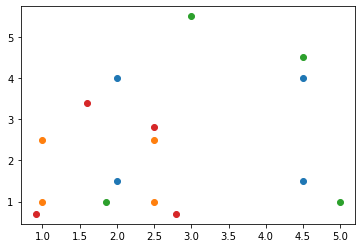

In [3]:
"""Final Algorithm"""
#fixing 2nd and 3rd Quarant problem
import math
import matplotlib.pyplot as plt
import numpy as np
import datetime
begin_time = datetime.datetime.now()


def dist(p1,p2):
    return math.sqrt((p1[1]-p2[1])**2+(p1[0]-p2[0])**2)

def centre(face):
    return (face[0][0]+(dist(face[0],face[1])/2),face[0][1]-(dist(face[1],face[3])/2))

def height(face):
    return dist(face[0],face[2])

def aratio(point,face):
    return dist(point,centre(face))

def angle(point,face):
    
    c=centre(face)
    if(badQuad(c,point)):
        return math.atan((point[1]-c[1])/(point[0]-c[0]))+math.pi
    return math.atan((point[1]-c[1])/(point[0]-c[0]))

def npoint(ncentre,ndist,angle):
    return ((ndist*math.cos(angle)+ncentre[0]),(ndist*math.sin(angle)+ncentre[1]))

def badQuad(centre,point):
    if(point[0]<centre[0]):
        return 1
    return 0

def sep(vec):
    xs=[]
    ys=[]
    for i in range(0,len(vec)):
        xs.append(vec[i][0])
        ys.append(vec[i][1])
    return [xs,ys]
    

#myPoints=[(3,5.5),(4.5,4.5),(5,3.5)]
myPoints=[(3,5.5),(4.5,4.5),(1.85,1),(5,1)]

face=[(2,4),(4.5,4),(2,1.5),(4.5,1.5)]
a=0
b=0
nface=[(1+a,2.5+b),(2.5+a,2.5+b),(1+a,1+b),(2.5+a,1+b)]


v_aratio=[]
v_dist=[]
v_angles=[]
new_points=[]




for i in myPoints:
    v_aratio.append(dist(i,centre(face))/height(face))
    

for i in v_aratio:
    v_dist.append(i*height(nface))


for i in myPoints:
    v_angles.append(angle(i,face))
    
for i,j in zip(v_dist,v_angles):
    new_points.append(npoint(centre(nface),i,j))

plt.scatter(sep(face)[0],sep(face)[1])
plt.scatter(sep(nface)[0],sep(nface)[1])
plt.scatter(sep(myPoints)[0],sep(myPoints)[1])
plt.scatter(sep(new_points)[0],sep(new_points)[1])



print("my points     :",myPoints)
print("aspect ratios : ",v_aratio)
print("new distances : ",v_dist)
print("angles : ",list(map(math.degrees,(v_angles))))
print("new points : ",new_points)


print(datetime.datetime.now() - begin_time)


In [ ]:
#attempt 1
"""
Problems:
    -Make reference face only while drawing ie, calculate aspect ratio,angle while drawing only and 
     not during every image capture to livestream video
    -crashes when drawing points exist and no face detected ie, at nface part so check for its existence 
     before passing it as an argumnent
"""

import cv2
import math

cap = cv2.VideoCapture(0)
face_cascade=cv2.CascadeClassifier('Haarcascades/haarcascade_frontalface_default.xml');
myPoints =  []
drawing = False 
ix,iy = -1,-1
face=[]
nface=[]
v_aratio=[]
v_dist=[]
v_angles=[]

def dist(p1,p2):
    return math.sqrt((p1[1]-p2[1])**2+(p1[0]-p2[0])**2)

def centre(face):
    return (face[0][0]+(dist(face[0],face[1])/2),face[0][1]-(dist(face[1],face[3])/2))

def height(face):
    return dist(face[0],face[2])

def aratio(point,face):
    return dist(point,centre(face))

def angle(point,face):
    
    c=centre(face)
    if(badQuad(c,point)):
        return math.atan((point[1]-c[1])/(point[0]-c[0]))+math.pi
    return math.atan((point[1]-c[1])/(point[0]-c[0]))

def npoint(ncentre,ndist,angle):
    return (int(ndist*math.cos(angle)+ncentre[0]),int(ndist*math.sin(angle)+ncentre[1]))

def badQuad(centre,point):
    if(point[0]<centre[0]):
        return 1
    return 0

def sep(vec):
    xs=[]
    ys=[]
    for i in range(0,len(vec)):
        xs.append(vec[i][0])
        ys.append(vec[i][1])
    return [xs,ys]

def ar(myPoints):
    v_aratio=[]
    v_dist=[]
    v_angles=[]
    if drawing==False and len(face)!=0:  
        print("in")
        for i in myPoints:
            v_aratio.append(dist(i,centre(face))/height(face))
        #detect current face here
        ret,frame = cap.read()
        gray=cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY)
        nface=nFace(gray,frame)
        
        for i in v_aratio:
            v_dist.append(i*height(nface))

        for i in myPoints:
            v_angles.append(angle(i,face))
            
        uPoints=[]
        for i,j in zip(v_dist,v_angles):
            uPoints.append(npoint(centre(nface),i,j))
        print("ratio",v_aratio)
        print("new dist" ,v_dist)
        print("angles",v_angles)
        print(uPoints," next \n")
        return uPoints
    return myPoints
        

def detectFace(gray,frame):
    global face
    faces=face_cascade.detectMultiScale(gray,1.3,5)
    for(x,y,w,h) in faces:
        cv2.rectangle(frame,(x,y),(x+h,y+h),(12,153,36),2)
        face=[(x,y),(x+h,y),(x,y+h),(x+h,y+h)]
        #print("face : ",face)
    return frame

def nFace(gray,frame):
    faces=face_cascade.detectMultiScale(gray,1.3,5)
    for(x,y,w,h) in faces:
        #cv2.rectangle(frame,(x,y),(x+h,y+h),(12,153,36),2)
        nface=[(x,y),(x+h,y),(x,y+h),(x+h,y+h)]
        #print("face : ",face)
    return nface



def draw_circle(event,x,y,flags,param):
    global ix,iy,drawing,myPoints
    if event == cv2.EVENT_LBUTTONDOWN:
        drawing = True
        ix,iy = x,y
        myPoints.append((x,y))
    elif event == cv2.EVENT_MOUSEMOVE:
        if drawing == True:
            #cv2.circle(canvas,(x,y),5,(0,0,255),-1)
            myPoints.append((x,y))
            print(x," ",y)
    elif event == cv2.EVENT_LBUTTONUP:
        drawing = False

def drawOnCanvas(myPoints):
    for point in myPoints:
        cv2.circle(canvas, (point[0], point[1]), 8,(0,0,255), cv2.FILLED)
def drawOnCanvas2(myPoints):
    for point in myPoints:
        cv2.circle(canvas, (point[0], point[1]), 3,(255,0,255), cv2.FILLED)
        
cv2.namedWindow('AR DOODLING')
cv2.setMouseCallback('AR DOODLING',draw_circle)

    

while(1):
    ret,frame = cap.read()
    gray=cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY)
    canvas=detectFace(gray,frame)
   
    #cv2.imshow('image',img)
    if len(myPoints)!=0:
        myPoints=ar(myPoints)
        drawOnCanvas(myPoints)
    cv2.imshow('AR DOODLING',canvas)
    k = cv2.waitKey(1) & 0xFF
    if k == 13:
        break
    elif k== ord('r'):
        myPoints=[]
cap.release()
cv2.destroyAllWindows()

